In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.special import gamma as gamma_func
import matplotlib.ticker as ticker

plt.style.use('ggplot')

# Muestras
bins = 10000

#dist_gamma = ((gamma*rho*b**((alpha+1)/gamma))/x)* ((D/2)**alpha) * np.exp(-b*((D/2)**gamma))
def dist_gamma (D,rho,alpha,gamma,d_c):
    shape = (alpha+1)/gamma
    # gamma func
    x = gamma_func(shape)
    # Deirmendjian and Isaac 2001
    b = alpha/(gamma*((d_c/2)**gamma))
    return ((gamma*rho*(b**shape))/x) * ((D/2)**alpha) * np.exp(-b*((D/2)**gamma))

In [ ]:
# Crear un array de 0 a 0.08 con 200 repeticiones por valor
# Niebla
rho = [20.0,20.0,100] # cm-3
alpha = [3.0,3.0,2.0]
gamma = [1.0,1.0,0.5]
d_c = [20e-3,16e-3,0.14e-3] # mm

D = np.linspace(0, 80e-3, bins) # Warning hardcoded range of D
print(D)

distrib_gamma_arr = []
# Calcular la densidad de probabilidad para cada valor de D
for i in range(len(rho)):
  distrib_gamma_arr.append(dist_gamma(D,rho[i],alpha[i],gamma[i],d_c[i]))

print(len(distrib_gamma_arr))
print(distrib_gamma_arr)

[0.00000000e+00 8.00080008e-06 1.60016002e-05 ... 7.99839984e-02
 7.99919992e-02 8.00000000e-02]
3
[array([0.00000000e+00, 1.72644532e-06, 1.37949970e-05, ...,
       1.06363284e+01, 1.06267595e+01, 1.06171989e+01]), array([0.00000000e+00, 4.21368997e-06, 3.36589883e-05, ...,
       1.29362663e+00, 1.29207511e+00, 1.29052541e+00]), array([0.00000000e+00, 3.06038254e+04, 8.23794202e+04, ...,
       2.39033581e-29, 2.37940905e-29, 2.36853277e-29])]


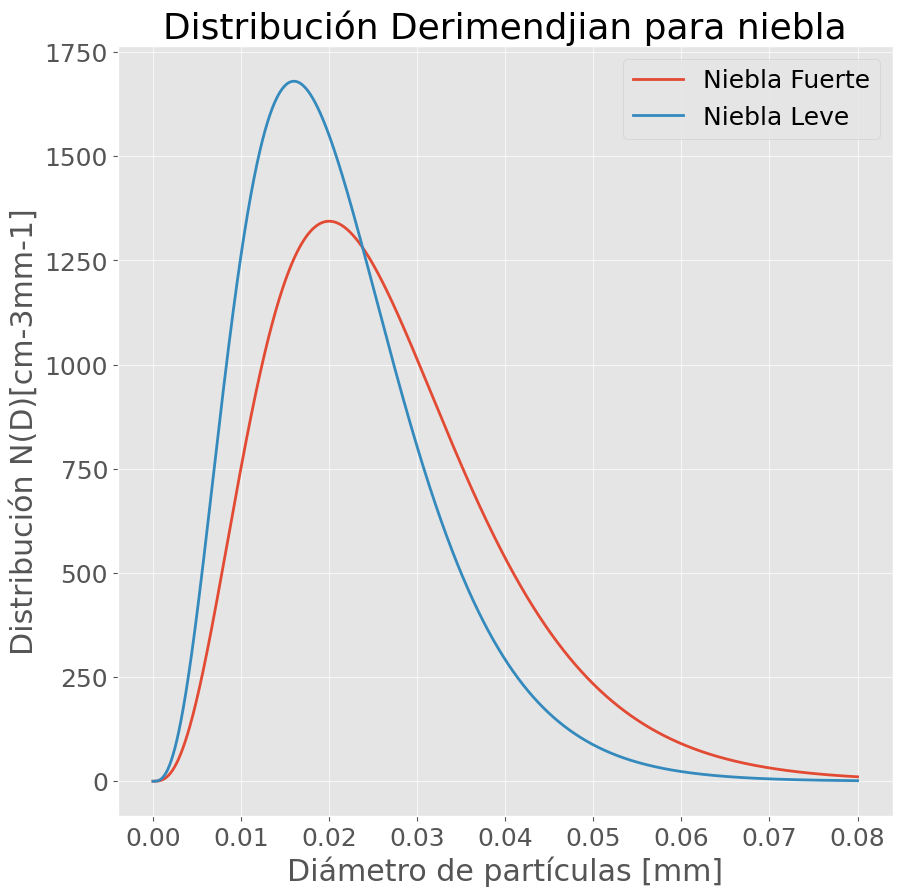

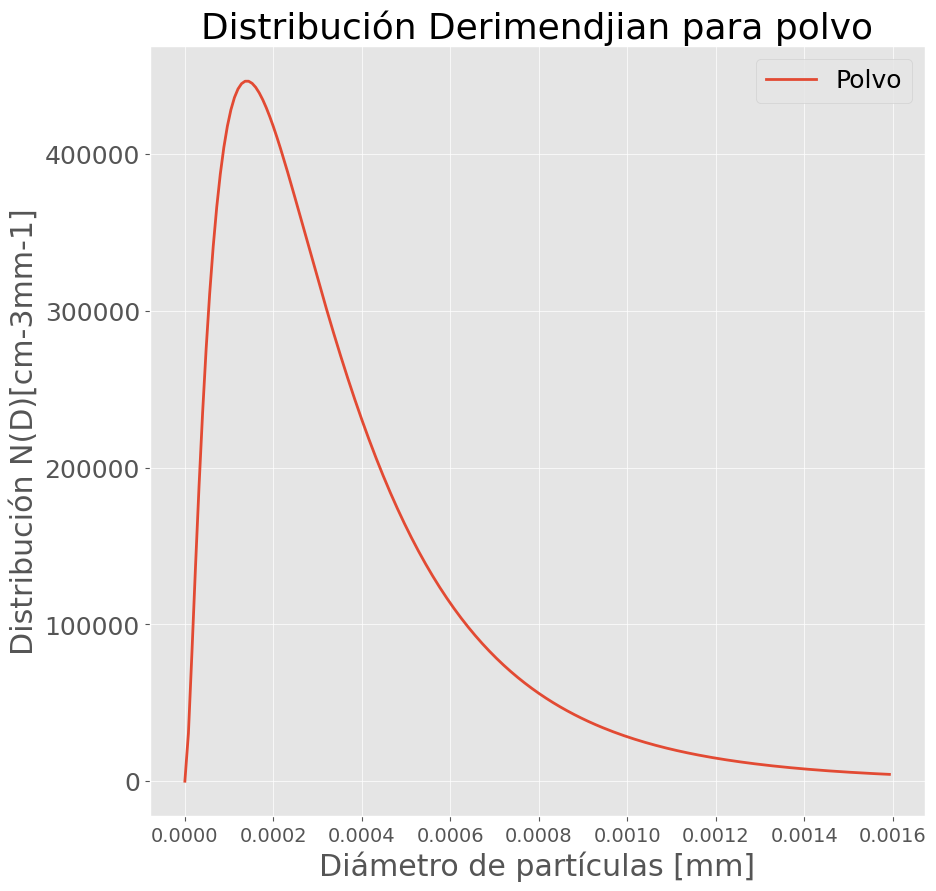

In [ ]:
plt.rcParams.update({'font.size': 18})  # Cambia el tamaño de la fuente a 14

plt.figure(figsize=(10, 10))
plt.plot(D, distrib_gamma_arr[0], label='Niebla Fuerte', linewidth=2)
plt.plot(D, distrib_gamma_arr[1], label='Niebla Leve', linewidth=2)
plt.xlabel('Diámetro de partículas [mm]')
plt.ylabel('Distribución N(D)[cm-3mm-1]')
plt.title('Distribución Derimendjian para niebla')
plt.grid(True, linestyle='-', linewidth=0.5)
plt.legend()
plt.show()



plt.figure(figsize=(10, 10))
plt.plot(D[0:200], distrib_gamma_arr[2][0:200], label='Polvo', linewidth=2)
plt.xlabel('Diámetro de partículas [mm]')
plt.ylabel('Distribución N(D)[cm-3mm-1]')
plt.title('Distribución Derimendjian para polvo')
plt.grid(True, linestyle='-', linewidth=0.5)

plt.xticks(fontsize=14)
plt.legend()
plt.show()


In [ ]:
# Crear un array de 0 a 0.08 con 200 repeticiones por valor
# Lluvia
rho = [0.001,100,100] # m-3
alpha = [2,6,6]
gamma = [0.5,1.0,1.0]
d_c = [140e-3,8e-3,4e-3] # mm

D = np.linspace(0, 0.2*10, bins) # Warning hardcoded range of D
print(D)

distrib_gamma_arr = []
# Calcular la densidad de probabilidad para cada valor de D
for i in range(len(rho)):
  distrib_gamma_arr.append(dist_gamma(D,rho[i],alpha[i],gamma[i],d_c[i]))

[0.00000000e+00 2.00020002e-04 4.00040004e-04 ... 1.99959996e+00
 1.99979998e+00 2.00000000e+00]


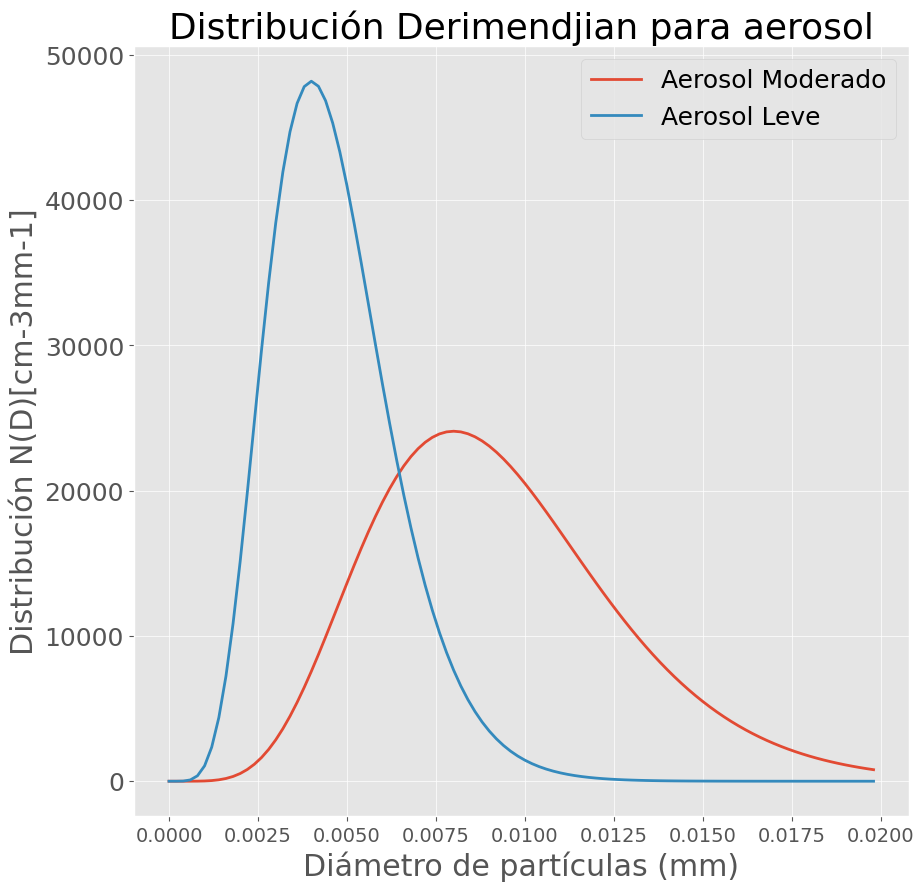

In [ ]:
# Plotear la distribución de probabilidad
plt.figure(figsize=(10, 10))
#plt.plot(D, distrib_gamma_arr[0], label='Lluvia')
limit = 100
plt.plot(D[0:limit], distrib_gamma_arr[1][0:limit], label='Aerosol Moderado',linewidth=2.0)
plt.plot(D[0:limit], distrib_gamma_arr[2][0:limit], label='Aerosol Leve',linewidth=2.0)
#plt.hist(dist_gamma, bins=100, density=False, alpha=0.6, color='g', label='Muestras de la Distribución')
plt.xlabel('Diámetro de partículas (mm)')
plt.ylabel('Distribución N(D)[cm-3mm-1]')
plt.title('Distribución Derimendjian para aerosol')
plt.grid(True, linestyle='-', linewidth=0.5)
plt.xticks(fontsize=14)
plt.legend()
plt.show()

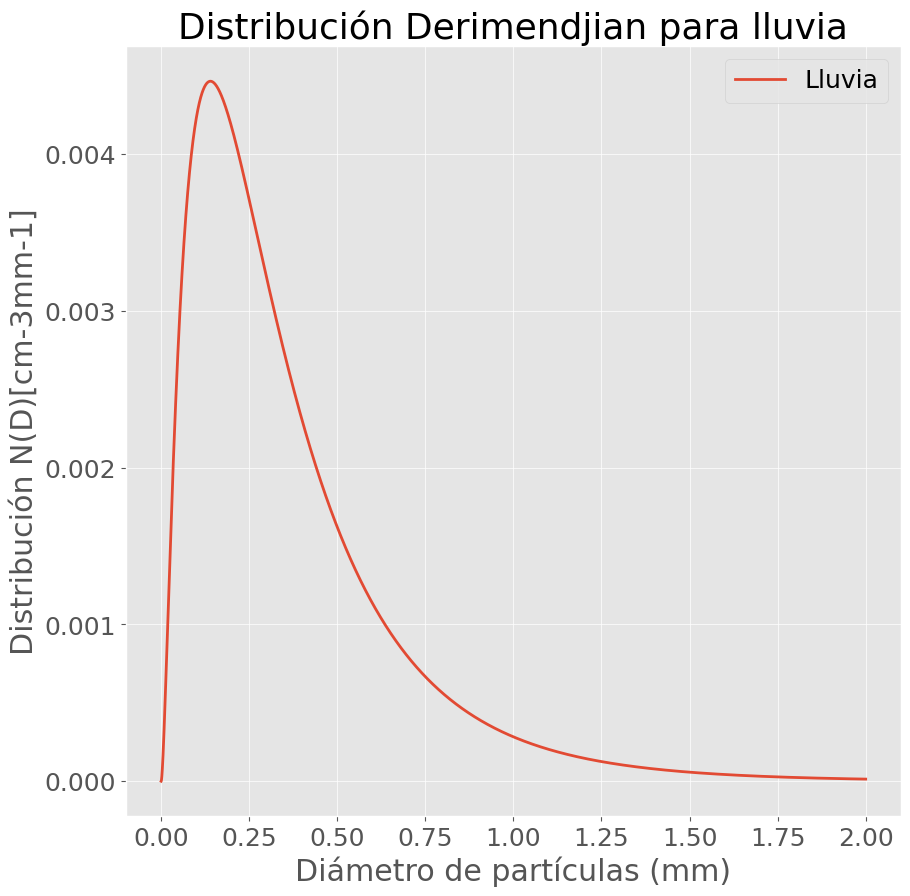

In [ ]:
# Plotear la distribución de probabilidad
plt.figure(figsize=(10, 10))
plt.plot(D, distrib_gamma_arr[0], label='Lluvia', linewidth=2)
limit = 50
plt.xlabel('Diámetro de partículas (mm)')
plt.ylabel('Distribución N(D)[cm-3mm-1]')
plt.title('Distribución Derimendjian para lluvia')
plt.grid(True, linestyle='-', linewidth=0.5)
plt.legend()
plt.show()

In [ ]:
!pip install miepython

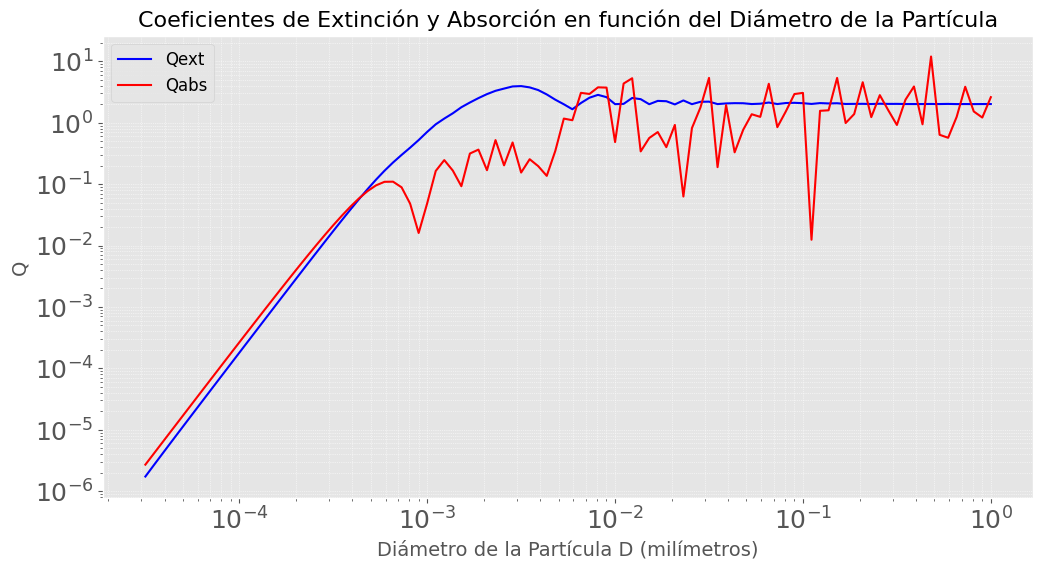

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import miepython as mie

# Constantes
wavelength = 1.55  # longitud de onda en micrómetros (905 nm = 0.905 micrómetros)
refractive_index_particle = 1.323520 + 5.1150e-7j  # índice de refracción complejo de la partícula
refractive_index_medium = 1.0  # índice de refracción del medio (aire)

# Generar diámetros de partículas en milímetros
D = np.logspace(-4.5, 0, 100)  # en milímetros, desde 10^-6 hasta 10^2

# Convertir D a micrómetros para los cálculos de Mie
D_micrometros = D * 1000  # 1 mm = 1000 micrómetros

# Calcular parámetros de Mie
size_parameter = np.pi * D_micrometros / wavelength
m = refractive_index_particle / refractive_index_medium

# Inicializar arrays para almacenar resultados
qext = np.zeros_like(D)
qabs = np.zeros_like(D)

# Calcular Qext y Qabs para cada diámetro
for i, x in enumerate(size_parameter):
    qext[i], qsca, qabs[i], g = mie.mie(m, x)

# Graficar los resultados
plt.figure(figsize=(12, 6))
plt.plot(D, qext, label='Qext', color='b')
plt.plot(D, qabs, label='Qabs', color='r')
plt.xscale('log')  # Escala logarítmica para el eje x
plt.yscale('log')  # Escala logarítmica para el eje y
plt.xlabel('Diámetro de la Partícula D (milímetros)', fontsize=14)
plt.ylabel('Q', fontsize=14)
plt.title('Coeficientes de Extinción y Absorción en función del Diámetro de la Partícula', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle=':', linewidth=0.5)
plt.show()